In [45]:
import pandas as pd

df = pd.read_csv("//Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/DATASET/Goldman /slide/combined/output_combined_predicted_price.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123266 entries, 0 to 3123265
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Unnamed: 0.1     float64
 2   index            float64
 3   COLLECTION_TIME  object 
 4   MESSAGE_ID       float64
 5   MESSAGE_TYPE     object 
 6   SYMBOL           object 
 7   PRICE            float64
 8   SIZE             float64
 9   TRADE_ID         float64
 10  TRADE_FLAGS      object 
 11  File_Name        object 
 12  0                float64
 13  level_0          float64
dtypes: float64(8), int64(1), object(5)
memory usage: 333.6+ MB


In [47]:
df.rename(columns = {'0':'predicted_price'}, inplace = True) ## renaming the column 

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123266 entries, 0 to 3123265
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   Unnamed: 0.1     float64
 2   index            float64
 3   COLLECTION_TIME  object 
 4   MESSAGE_ID       float64
 5   MESSAGE_TYPE     object 
 6   SYMBOL           object 
 7   PRICE            float64
 8   SIZE             float64
 9   TRADE_ID         float64
 10  TRADE_FLAGS      object 
 11  File_Name        object 
 12  predicted_price  float64
 13  level_0          float64
dtypes: float64(8), int64(1), object(5)
memory usage: 333.6+ MB


In [49]:
df = df.drop(df.columns[0], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123266 entries, 0 to 3123265
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0.1     float64
 1   index            float64
 2   COLLECTION_TIME  object 
 3   MESSAGE_ID       float64
 4   MESSAGE_TYPE     object 
 5   SYMBOL           object 
 6   PRICE            float64
 7   SIZE             float64
 8   TRADE_ID         float64
 9   TRADE_FLAGS      object 
 10  File_Name        object 
 11  predicted_price  float64
 12  level_0          float64
dtypes: float64(8), object(5)
memory usage: 309.8+ MB


In [50]:
df = df.drop(df.columns[0], axis = 1)
df = df.drop(df.columns[11], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123266 entries, 0 to 3123265
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   index            float64
 1   COLLECTION_TIME  object 
 2   MESSAGE_ID       float64
 3   MESSAGE_TYPE     object 
 4   SYMBOL           object 
 5   PRICE            float64
 6   SIZE             float64
 7   TRADE_ID         float64
 8   TRADE_FLAGS      object 
 9   File_Name        object 
 10  predicted_price  float64
dtypes: float64(6), object(5)
memory usage: 262.1+ MB


In [51]:
df['COLLECTION_TIME'] = pd.to_datetime(df['COLLECTION_TIME']) #changing the type of collection_time to date_time
df['date'] = pd.to_datetime(df['COLLECTION_TIME']).dt.date # generating date from collection time
df['date'] = pd.to_datetime(df['date'])# covverting date to datetime

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123266 entries, 0 to 3123265
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   index            float64       
 1   COLLECTION_TIME  datetime64[ns]
 2   MESSAGE_ID       float64       
 3   MESSAGE_TYPE     object        
 4   SYMBOL           object        
 5   PRICE            float64       
 6   SIZE             float64       
 7   TRADE_ID         float64       
 8   TRADE_FLAGS      object        
 9   File_Name        object        
 10  predicted_price  float64       
 11  date             datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(4)
memory usage: 285.9+ MB


In [53]:
df= df.set_index("COLLECTION_TIME")# setting the index of collection_time

In [54]:
df.shape #checking the dimensions

(3123266, 11)

In [55]:
df= df.dropna() #dropping the NA in prie

In [56]:
df.shape #checking the new dimension

(3023958, 11)

In [57]:
!pip install sklearn
from sklearn.metrics import mean_squared_error

In [58]:
# Calculation of buy and sell 100 lots of shares based on return and simplemoving average 
import numpy as np

df['return'] = df['predicted_price'].pct_change().shift(-1) #calculating return 
df['sma_100'] = df['predicted_price'].rolling(window = 100).mean() #calculate SMA = 100 days
df['sma_40'] = df['predicted_price'].rolling(window = 40).mean() #calculate SMA = 40 days
df['signal'] = np.where(df['sma_100'] < df['sma_40'],1,0) #  if SMA_100 < SMA40 as condition 
df['trade'] = df['signal'].diff() # if trade is 1 you buy and trade is -1, you sell
df['cum_return'] = (df['return']+1).cumprod() # calculating cumulative returns
df['pnl'] = df['predicted_price']*df['trade']*100 # Total PNL for each trade
df['cum_pnl'] = df['pnl'].cumsum()
df['Price_difference_MSE'] = (df['PRICE'] - df['predicted_price'])**2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3023958 entries, 2022-01-03 13:04:20.787272960 to 2022-12-02 20:59:46.817294080
Data columns (total 20 columns):
 #   Column                Dtype         
---  ------                -----         
 0   index                 float64       
 1   MESSAGE_ID            float64       
 2   MESSAGE_TYPE          object        
 3   SYMBOL                object        
 4   PRICE                 float64       
 5   SIZE                  float64       
 6   TRADE_ID              float64       
 7   TRADE_FLAGS           object        
 8   File_Name             object        
 9   predicted_price       float64       
 10  date                  datetime64[ns]
 11  return                float64       
 12  sma_100               float64       
 13  sma_40                float64       
 14  signal                int64         
 15  trade                 float64       
 16  cum_return            float64       
 17  pnl                   float64  

In [60]:
df['trade'].value_counts()

 0.0    2993377
 1.0      15290
-1.0      15290
Name: trade, dtype: int64

In [61]:
df['pnl'].sum()

-23084.194999999523

In [62]:
#df.head()
df.tail()

index   MESSAGE_ID MESSAGE_TYPE SYMBOL  \
COLLECTION_TIME                                                           
2022-12-02 20:59:46.263844096  25028.0  118386528.0            T   AAPL   
2022-12-02 20:59:46.273391104  25029.0  118386749.0            T   AAPL   
2022-12-02 20:59:46.814430976  25030.0  118394856.0            T   AAPL   
2022-12-02 20:59:46.817219072  25031.0  118394903.0            T   AAPL   
2022-12-02 20:59:46.817294080  25032.0  118394904.0            T   AAPL   

                                 PRICE   SIZE      TRADE_ID  \
COLLECTION_TIME                                               
2022-12-02 20:59:46.263844096  147.755  100.0  3.577633e+09   
2022-12-02 20:59:46.273391104  147.755  100.0  3.577639e+09   
2022-12-02 20:59:46.814430976  147.745  100.0  3.577861e+09   
2022-12-02 20:59:46.817219072  147.745  200.0  3.577862e+09   
2022-12-02 20:59:46.817294080  147.745  200.0  3.577862e+09   

                                                   TRADE_FLAGS  \
COLLECTION_TIME                                                  
2022-12-02 20:59:46.263844096                    REGULAR_HOURS   
2022-12-02 20:59:46.273391104  INTERMARKET_SWEEP|REGULAR_HOURS   
2022-12-02 20:59:46.814430976                    REGULAR_HOURS   
2022-12-02 20:59:46.817219072                    REGULAR_HOURS   
2022-12-02 20:59:46.817294080                    REGULAR_HOURS   

                                              File_Name  predicted_price  \
COLLECTION_TIME                                                            
2022-12-02 20:59:46.263844096  trade_data_1003_1202.csv        147.86430   
2022-12-02 20:59:46.273391104  trade_data_1003_1202.csv        147.86517   
2022-12-02 20:59:46.814430976  trade_data_1003_1202.csv        147.86555   
2022-12-02 20:59:46.817219072  trade_data_1003_1202.csv        147.86607   
2022-12-02 20:59:46.817294080  trade_data_1003_1202.csv        147.86690   

                                    date    return     sma_100      sma_40  \
COLLECTION_TIME                                                              
2022-12-02 20:59:46.263844096 2022-12-02  0.000006  147.907328  147.866476   
2022-12-02 20:59:46.273391104 2022-12-02  0.000003  147.906052  147.865912   
2022-12-02 20:59:46.814430976 2022-12-02  0.000004  147.904826  147.865385   
2022-12-02 20:59:46.817219072 2022-12-02  0.000006  147.903657  147.864907   
2022-12-02 20:59:46.817294080 2022-12-02       NaN  147.902552  147.864496   

                               signal  trade  cum_return  pnl    cum_pnl  \
COLLECTION_TIME                                                            
2022-12-02 20:59:46.263844096       0    0.0    0.834390  0.0 -23084.195   
2022-12-02 20:59:46.273391104       0    0.0    0.834392  0.0 -23084.195   
2022-12-02 20:59:46.814430976       0    0.0    0.834395  0.0 -23084.195   
2022-12-02 20:59:46.817219072       0    0.0    0.834399  0.0 -23084.195   
2022-12-02 20:59:46.817294080       0    0.0         NaN  0.0 -23084.195   

                               Price_difference_MSE  
COLLECTION_TIME                                      
2022-12-02 20:59:46.263844096              0.011946  
2022-12-02 20:59:46.273391104              0.012137  
2022-12-02 20:59:46.814430976              0.014532  
2022-12-02 20:59:46.817219072              0.014658  
2022-12-02 20:59:46.817294080              0.014860

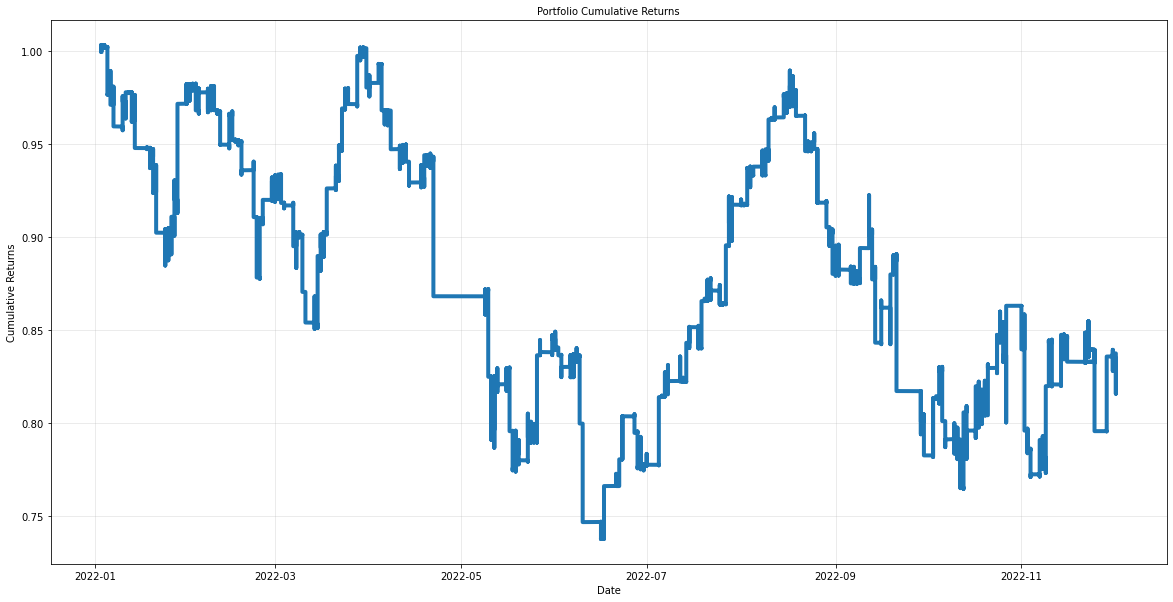

In [63]:
import matplotlib.pyplot as plt

#implementng cumulative returns graphs
plt.rcParams['figure.figsize'] = 20,10
plt.grid(True, alpha = .3)
plt.plot(df['date'],df['cum_return'],linewidth= 4.0)
plt.xlabel('Date',fontsize=10)
plt.ylabel("Cumulative Returns",fontsize=10)
plt.title("Portfolio Cumulative Returns",fontsize=10)
plt.show();



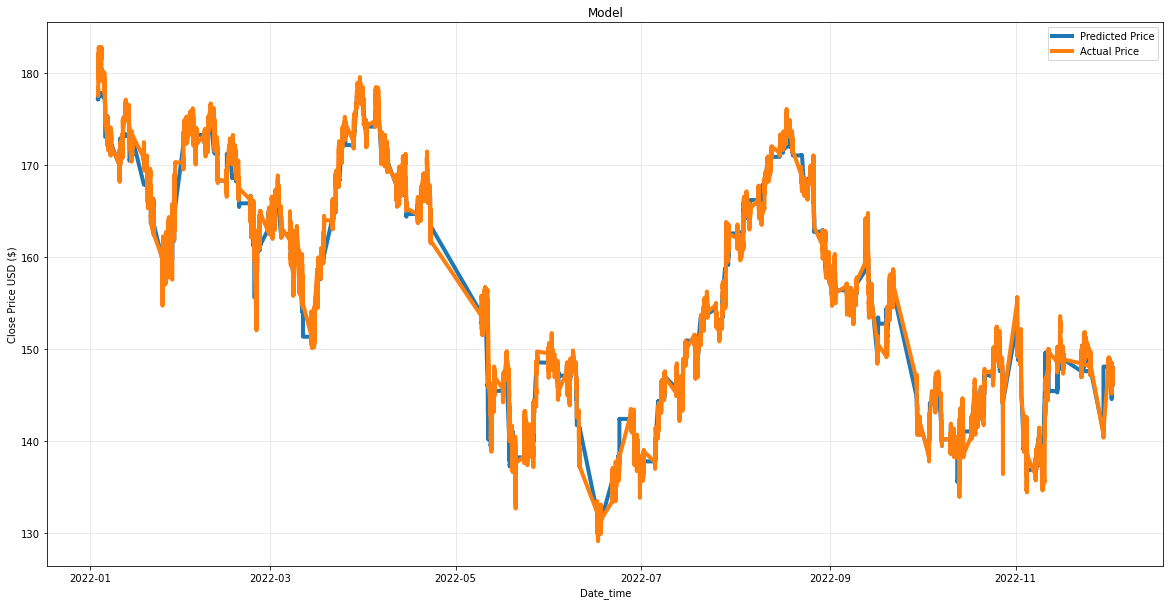

In [64]:
import matplotlib.pyplot as plt
#looking at prediciton and actual price and strategies 
#Plottting the predicted_price and actual_price
#fig = plt.figure()
#ax1 = fig.add_axes([2,2.2,3,3])
plt.rcParams['figure.figsize'] = 20,10
plt.grid(True, alpha = .3)
plt.title('Model' )
plt.title('Model' )
plt.xlabel('Date_time',fontsize=10)

plt.ylabel('Close Price USD ($)',fontsize=10)
plt.plot(df['predicted_price'],label = "Predicted Price",linewidth= 4.0)
plt.plot(df['PRICE'], label ="Actual Price ",linewidth= 4.0)
plt.legend(fontsize=10)
plt.show()


In [65]:
df_sample = df.tail(5000)

In [66]:
df_sample['trade'].value_counts()

 0.0    4947
-1.0      27
 1.0      26
Name: trade, dtype: int64

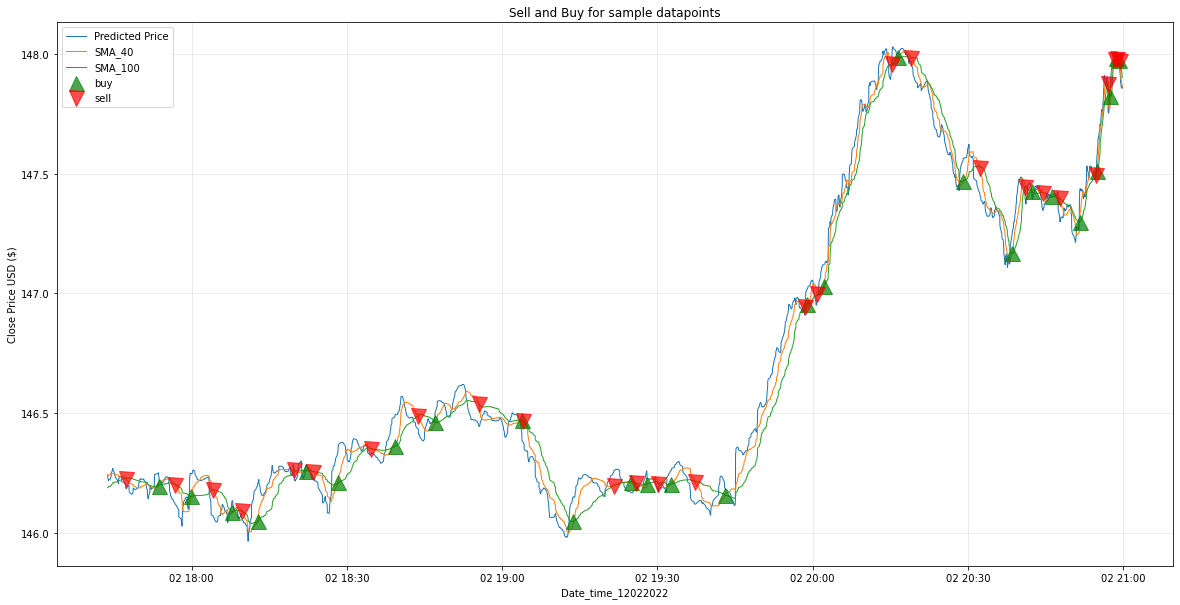

In [67]:
#looking at prediciton and actual price and strategies 
#Plottting the predicted_price and actual_price
#fig = plt.figure()
#ax1 = fig.add_axes([2,2.2,3,3])
plt.rcParams['figure.figsize'] = 20,10
plt.grid(True, alpha = .3)
plt.title('Sell and Buy for sample datapoints' )

plt.xlabel('Date_time_12022022',fontsize=10)

plt.ylabel('Close Price USD ($)',fontsize= 10)
plt.plot(df_sample ['predicted_price'],label = "Predicted Price",linewidth= 1.0)
#plt.plot(df['PRICE'], label ="Actual Price ",linewidth= 1.0)
plt.plot(df_sample ['sma_40'], label ="SMA_40",linewidth= 1.0)
plt.plot(df_sample ['sma_100'], label ="SMA_100",linewidth= 1.0)

# plot 'buy' signals
plt.plot(df_sample[df_sample['trade'] == 1].index, 
         df_sample['sma_40'][df_sample['trade'] == 1], 
         '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

# plot 'sell' signals
plt.plot(df_sample[df_sample['trade'] == -1].index, 
         df_sample['sma_40'][df_sample['trade'] == -1], 
         'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
plt.legend(fontsize=10)
plt.show()


In [68]:
df['pnl'].sum()

-23084.194999999523

In [69]:
df_final = df

In [70]:
df_final.to_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/DATASET/Goldman /slide/output_with_strategy/df_final.csv")

In [71]:
df1_pnl = df_final.groupby(['date'])['pnl'].sum() # calculating the PNL datewise 

In [72]:
df2 = df_final.groupby('date')['pnl'].sum()

In [73]:
df2_PNL_datewise = df2

In [74]:
df2_PNL_datewise.to_csv("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/DATASET/Goldman /slide/output_strategy_datewise/df2_PNL_datewise.csv")

In [86]:
# Calcualting MSE average 

df2_MSE = np.sqrt(df_final['Price_difference_MSE'].mean())
df2_MSE

1.4056298858060046

In [76]:
#calulating Average Trade Net Profit

total_trade_count_sell = sum((df_final.trade == 1) | (df_final.trade == -1))

Average_total_net_profit = df_final['pnl'].sum()/total_trade_count_sell 
Average_total_net_profit

-0.7548788423806253

In [77]:
#minimum PNL
min_pnl = np.min(df2)
min_pnl

-29818.51099999999

In [78]:
df2_pnl = df_final.groupby(['date']).sum()

In [79]:
df2_pnl_final = df2_pnl.loc[:,'pnl']
df2_pnl_final.head()

date
2022-01-03    17741.140
2022-01-04   -17783.678
2022-01-05      -22.140
2022-01-06     -272.736
2022-01-07     -193.111
Name: pnl, dtype: float64

In [80]:
drawdown = df2_pnl_final[(df2_pnl_final<0)]

In [81]:
#max profit  
max_pnl= max(df2_pnl_final)
max_pnl

44200.334999999985

In [82]:
#max_drawdown
max_drawdown = (-max_pnl+min_pnl)/(0+max_pnl)
max_drawdown

-1.674621832617332

In [83]:
#sharpe ratio
def sharpe_ratio(pnl):
    pnl_dif = np.diff(pnl)
    pnl_dif  = pnl_dif[~np.isinf(pnl_dif)]
    sharpe = np.nanmean(pnl_dif)/np.nanstd(pnl_dif)*np.sqrt(252)
    return sharpe

shape_ratio = sharpe_ratio(df2_pnl_final)
shape_ratio

-0.07351816944104697

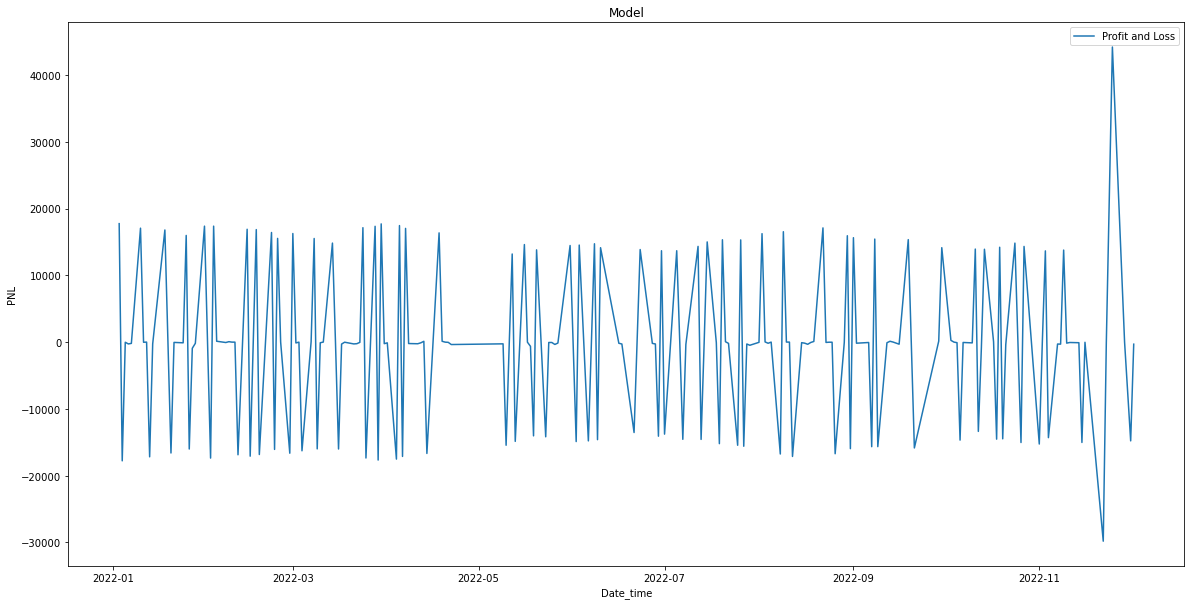

In [84]:
import matplotlib.pyplot as plt
#looking at prediciton and actual price and strategies 
#Plottting the profit annd loss

plt.title('Model')
plt.xlabel('Date_time')
plt.ylabel('PNL')
plt.plot(df2_pnl_final,label = "Profit and Loss")

plt.legend()
plt.show()
#plt.savefig("/Users/pallaviprakash/Desktop/Fall 22 sem 3/Algorithm microstructure/DATASET/Goldman /slide/figure/price.jpg")

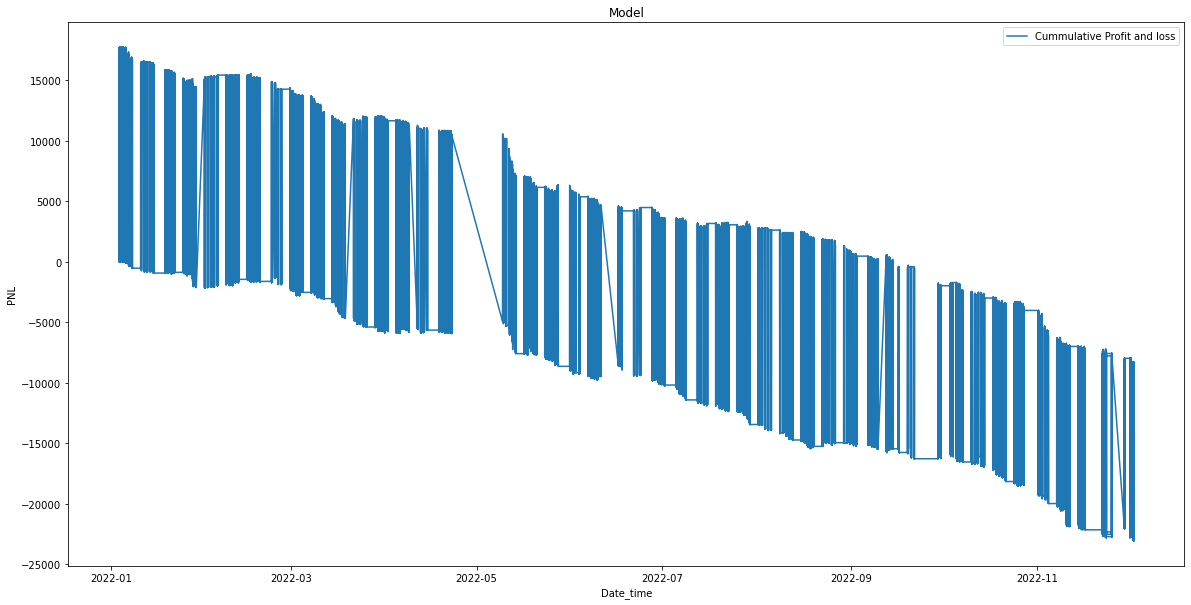

In [85]:
import matplotlib.pyplot as plt
#looking at prediciton and actual price and strategies 
#Plottting the profit annd loss

plt.title('Model')
plt.xlabel('Date_time')
plt.ylabel('PNL')
plt.plot(df_final['cum_pnl'],label = "Cummulative Profit and loss")

plt.legend()
plt.show()